# HOME ASSIGNMENT #4: DATABASE DESIGN & SQL

**Mục đích của bài Assignment**
> *   Hiểu các bước design Database cho Case study cụ thể: DataCracy
*   Bài tập SQL (Dựa trên Cheatsheet)
*   `[Optional]` Bài tập Python Pandas (Dựa trên Cheatsheet)

**Các kiến thức áp dụng**
* Slack API, JSON to DataFrame
* Phân tích Data (Assignment#1, Lab#1)
* Database (DB) Design
* SQL
* Python Pandas

**Lời Khuyên**
* Đây là bài tập dài, nhưng thiên về hiểu case studies và thiết kế => Nên bạn **hãy bắt đầu sớm**
* **Chắc chắn là bạn đọc thực kỹ các bước hướng dẫn và tài liệu, tận dụng Slack để trao đổi**
* **Đừng sa đà vào Code của STEP 0** (bước này tương tự Assignmetn 3 về Slack API, nhưng biến đổi thêm cho phù hợp)
* **Đừng sa đà vào các tiểu tiết** => Rất quan trọng là bạn cố gắng đi đến hết `TODO#6` để hiểu bức tranh toàn cảnh và kết nối được kiến thức. Sau khi đi hết qua, các bạn có thể trở lại và nhìn cận vào các tiểu tiết
* Làm nhiều nhất có thể (Đừng quá lo lắng nếu bạn không thể hoàn thành hết)

# CONCEPT: DB Design & SQL
## **Database (DB) - Cơ sở dữ liệu**
> Là cấu trúc các nhóm data, lưu trữ trên bộ nhớ hoặc trên cloud, cho phép truy nhập để trích xuất dữ liệu bằng nhiều cách thức khác nhau

* Cấu trúc một DB phải giúp cho việc lưu trữ an toàn, tiết kiệm, linh động và bền vững. Đồng thời, việc trích xuất dữ liệu dễ dàng, nhanh chóng, và hiệu quả.
* Dạng DB đề cập trong Atom chủ yếu là **Relational Database** => Đây là dạng cấu trúc: 
  * Dữ liệu được tổ chức và lưu trữ dưới dáng bảng (tables)
  * Đặc trưng có các keys (Primary Keys - PK, Foreign Keys - FK) để biểu diễn/quy định mối quan hệ giữa các bảng. Chính nhờ các keys này, ta có thể kết nối các bảng khác nhau.
  * Việc tách dữ liệu thành các bảng giúp việc tổ chức dữ liệu được linh động, lưu trữ hiệu quả hơn. Nhưng vẫn đảm bảo việc dễ dàng kết nối các bảng bằng keys
* Ngoài ra, còn có dạng **Non-relational Database** các bạn có thể tìm hiểu thêm ([Databases 101](https://towardsdatascience.com/databases-101-introduction-to-databases-for-data-scientists-ee18c9f0785d))

## **DB Design**
> Là quá trình thiết kế và tổ chức dữ liệu theo mô hình Database. Thiết kế quy định những dữ liệu gì được lưu trữ, tổ chức các bảng được lưu trữ như thế nào, và các bảng data liên quan đến nhau ra sao. 

* **Thiết kế DB cần thoả mãn**: 
  1. Hạn chế trùng lặp trong lưu trữ thông tin
  2. Keys chỉ mối quan hệ của các bảng (PK, FK) hợp lý
  3. Kiểm tra tính đúng đắn (liên hệ keys, chất lượng data)
  4. Hỗ trợ hiệu quả nhất cho quá trình xử lý, phân tích và báo cáo

## **SQL**
* Là ngôn ngữ dùng để trích xuất, xử lý và phân tích data trên Rational Database


# CASE STUDY: DATACracy 
* **Context**: Không có doanh nghiệp hay tổ chức nào là quá nhỏ để dùng data, và bất kỳ tổ chức nào có vận hành (operation) thì nhất định sẽ sản sinh ra data, và có thể dùng data để theo dõi và cải thiện vận hành đó (Đọc: [DataCracy - Data Strategy](https://app.gitbook.com/@anhdang/s/datacracy/atom/1-data-strategy-and-metrics))
* **Hoạt động/Vận hành**: 
  * Datacracy đang vận hành lớp học mở ATOM (với 40 learners, 6 mentors, và Ban Tổ Chức)
  * Lớp học diễn ra mỗi tuần, với bài tập được gửi vào sáng Chủ Nhật và hoàn thành trước buổi học sáng T7
  * Các bạn Learners upload link (github) vào các Slack channels theo tuần (ví dụ: `#atom-assignment-1`)
  * Các hoạt động trao đổi, hướng dẫn giữa learners, mentors và BTC chủ yếu diễn ra trong tuần qua Slack


> Bản thân Datacracy cũng có vận hành và các hoạt động. Vậy hãy dùng chính mình làm case study cho việc, ta có thể tạo ra data solution siêu nhỏ, siêu rẻ cho một tổ chức quy mô siêu nhỏ như DataCracy không?





Trong **Assignment** này, chúng ta sẽ đi qua **6 bước chính** của quá trình design DB (cho case study cụ thể của DataCracy)
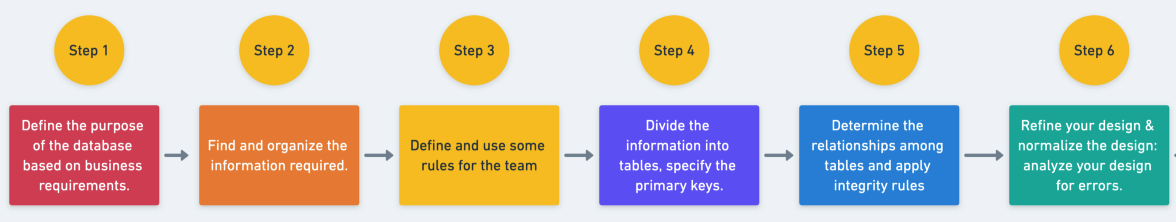

In [ ]:
!pip install duckdb

     |████████████████████████████████| 8.5MB 8.7MB/s 


In [ ]:
import requests # -> Để call API
import json # -> Xử lý file JSON
import pandas as pd # -> Thư viện xử lý dữ liệu dạng bảng
import re # -> Thư viện xử lý text: regular expressions
from datetime import datetime as dt # -> Thư viện xử lý dữ liệu thời gian
import duckdb # -> Thư viện "giả lập" xử lý dữ liệu bằng SQL 

## STEP 0: XEM LẠI DATA ĐÃ CÓ (SLACK API)

Ở bước đầu tiên, ta xem lại tất cả các data của DATACracy Atom mà ra đã biết: 
* **Data từ Slack API**:
  * Danh sách thành viên
  * Danh sách các channels
  * Lịch sử tin nhắn trên các channels
* **Data do dự án tự collect - File CSV (trích xuất từ Google Spreadsheet)**:
  * Danh sách thành viên được phân theo vị trí (mentors, learners, BTC)


===> Các dữ liệu này lần lượt được lấy bằng code bên dưới.


In [ ]:
## Load Token file 
## WARNING!! --- Put it in gitignore and DO NOT print out to notebook
with open('env_variable.json', 'r') as j:
    json_data = json.load(j)

### 0.1. Pull List of Members

In [ ]:
# 1. LIST OF SLACK MEMBERS 

## Pull list of member as JSON
## Gọi API từ Endpoints (Input - Token được đưa vào Headers)
## Challenge: Thử gọi API này bằng Postman
endpoint = "https://slack.com/api/users.list"
headers = {"Authorization": "Bearer {}".format(json_data['SLACK_BEARER_TOKEN'])}
response_json = requests.post(endpoint, headers=headers).json() 
user_dat = response_json['members']

## Convert to CSV
user_dict = {'user_id':[],'name':[],'display_name':[],'real_name':[],'title':[],'is_bot':[]}
for i in range(len(user_dat)):
  user_dict['user_id'].append(user_dat[i]['id'])
  user_dict['name'].append(user_dat[i]['name'])
  user_dict['display_name'].append(user_dat[i]['profile']['display_name'])
  user_dict['real_name'].append(user_dat[i]['profile']['real_name_normalized'])
  user_dict['title'].append(user_dat[i]['profile']['title'])
  user_dict['is_bot'].append(user_dat[i]['is_bot'])

user_df = pd.DataFrame(user_dict) 
#user_df = user_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
user_df.head()

,user_id,name,display_name,real_name,title,is_bot
0,USLACKBOT,slackbot,Slackbot,Slackbot,,False
1,U01AT4T75JB,loclexuan26392,Loc Le Xuan,Loc Le Xuan,,False
2,U01AVDY7JET,locle.ds,Loc Le Xuan,Loc Le Xuan,,False
3,U01BE2PR6LU,maianhdang.ftu,MAD,Dặng Huỳnh Mai Anh,Technical Contents,False
4,U01C48T7S1J,huyenhoang.design,Thanh Huyen Hoang,Thanh Huyen Hoang,,False


In [ ]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       75 non-null     object
 1   name          75 non-null     object
 2   display_name  75 non-null     object
 3   real_name     75 non-null     object
 4   title         75 non-null     object
 5   is_bot        75 non-null     bool  
dtypes: bool(1), object(5)
memory usage: 3.1+ KB


### 0.2. List of Channels

In [ ]:
# 2. LIST OF SLACK CHANNELS

endpoint2 = "https://slack.com/api/conversations.list"
data = {'types': 'public_channel,private_channel'} # -> CHECK: API Docs https://api.slack.com/methods/conversations.list/test
response_json = requests.post(endpoint2, headers=headers, data=data).json() 
channel_dat = response_json['channels']

channel_dict = {'channel_id':[], 'channel_name':[], 'is_channel':[],'creator':[],'created_at':[],'topics':[],'purpose':[],'num_members':[]}
for i in range(len(channel_dat)):
  channel_dict['channel_id'].append(channel_dat[i]['id'])
  channel_dict['channel_name'].append(channel_dat[i]['name'])
  channel_dict['is_channel'].append(channel_dat[i]['is_channel'])
  channel_dict['creator'].append(channel_dat[i]['creator'])
  channel_dict['created_at'].append(dt.fromtimestamp(float(channel_dat[i]['created'])))
  channel_dict['topics'].append(channel_dat[i]['topic']['value'])
  channel_dict['purpose'].append(channel_dat[i]['purpose']['value'])
  channel_dict['num_members'].append(channel_dat[i]['num_members'])

channel_df = pd.DataFrame(channel_dict) 
#channel_df = channel_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
channel_df.head()

,channel_id,channel_name,is_channel,creator,created_at,topics,purpose,num_members
0,C01B4PVGLVB,general,True,U01BE2PR6LU,2020-09-23 10:25:03,,This is the one channel that will always inclu...,65
1,C01BYH7JHB5,contents,True,U01BE2PR6LU,2020-10-05 07:28:09,,,12
2,C01CAMNCJJV,branding-design,True,U01AVDY7JET,2020-10-05 03:16:30,,,9
3,C01U6P7LZ8F,atom-assignment1,True,U01BE2PR6LU,2021-04-17 07:00:04,Assigment#1 - Python Basics &amp; Spreadsheet ...,Where learners submit assignments and give rev...,44
4,C01UL6K1C7L,atom-week1,True,U01BE2PR6LU,2021-04-16 17:44:32,TOPIC: Data Strategy. Metrics Design. Spreadsh...,TOPIC: Data Strategy. Metrics Design. Spreadsh...,43


In [ ]:
channel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   channel_id    21 non-null     object        
 1   channel_name  21 non-null     object        
 2   is_channel    21 non-null     bool          
 3   creator       21 non-null     object        
 4   created_at    21 non-null     datetime64[ns]
 5   topics        21 non-null     object        
 6   purpose       21 non-null     object        
 7   num_members   21 non-null     int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 1.3+ KB


### 0.3. Message Data

In [ ]:
endpoint3 = "https://slack.com/api/conversations.history"

In [ ]:
msg_dict = {'channel_id':[],'msg_id':[], 'msg_ts':[], 'user_id':[], 'latest_reply':[],'reply_user_count':[],'reply_users':[],'github_link':[]}
for channel_id, channel_name in zip(channel_df['channel_id'], channel_df['channel_name']):
  print('Channel ID: {} - Channel Name: {}'.format(channel_id, channel_name))
  #try:
  data = {"channel": channel_id} 
  response_json = requests.post(endpoint3, data=data, headers=headers).json()
  print(str(response_json))
  if response_json['ok']:
    msg_ls = response_json['messages']
    for i in range(len(msg_ls)):
      if 'client_msg_id' in msg_ls[i].keys():
        msg_dict['channel_id'].append(channel_id)
        msg_dict['msg_id'].append(msg_ls[i]['client_msg_id'])
        msg_dict['msg_ts'].append(dt.fromtimestamp(float(msg_ls[i]['ts'])))
        msg_dict['latest_reply'].append(dt.fromtimestamp(float(msg_ls[i]['latest_reply'] if 'latest_reply' in msg_ls[i].keys() else 0))) ## -> No reply: 1970-01-01
        msg_dict['user_id'].append(msg_ls[i]['user'])
        msg_dict['reply_user_count'].append(msg_ls[i]['reply_users_count'] if 'reply_users_count' in msg_ls[i].keys() else 0)
        msg_dict['reply_users'].append(msg_ls[i]['reply_users'] if 'reply_users' in msg_ls[i].keys() else 0) 
        ## -> Censor message contains tokens
        text = msg_ls[i]['text']
        github_link = re.findall('(?:https?://)?(?:www[.])?github[.]com/[\w-]+/?', text)
        msg_dict['github_link'].append(github_link[0] if len(github_link) > 0 else "")
  #except:
   # print('====> '+ str(response_json))

Channel ID: C01B4PVGLVB - Channel Name: general
{'ok': True, 'messages': [{'client_msg_id': 'da7ab6eb-0b3c-4bd6-a12a-589a12c56604', 'type': 'message', 'text': '<!channel> ASSIGNMENT 5 RELEASE\n---\n<#C023UJGMDND|atom-assignment5>\nTuần này sẽ giới thiệu cho mọi người 1 platform mới Kaggle\nBài tập hy vọng là nhẹ nhàng hơn, giúp các bạn xâu chuỗi ôn lại kiến thức nha.\nCó thắc mắc gì tích cực hỏi trên các channel nha mọi ng ơiii\n&gt; RULES: Format submit bài\nNhư chúng ta có học trong bài Database Design, về các rules để năng cao chất lượng data. Học đi đôi với hành, mọi người nộp bài để message theo cú pháp sau nha\n• Name: &lt;slack-user_ID của bạn&gt;\n• Status: DONE\n• Link: &lt;github_link&gt;\n<https://datacracy.slack.com/archives/C023UJGMDND/p1622339742001400>', 'user': 'U01BE2PR6LU', 'ts': '1622340097.001200', 'team': 'T01B7SGGMLJ', 'edited': {'user': 'U01BE2PR6LU', 'ts': '1622340206.000000'}, 'attachments': [{'from_url': 'https://datacracy.slack.com/archives/C023UJGMDND/p16223

In [ ]:
msg_df = pd.DataFrame(msg_dict)
#msg_df = msg_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
msg_df.tail()

,channel_id,msg_id,msg_ts,user_id,latest_reply,reply_user_count,reply_users,github_link
285,C022RRWQ6US,3db33d2a-5666-44cf-95e0-dd33aee4e63c,2021-05-24 11:49:29.003700,U01BE2PR6LU,1970-01-01 00:00:00.000000,0,0,
286,C022RRWQ6US,8b4a2ebb-7882-402b-8339-a0b067ce5165,2021-05-23 07:58:23.003000,U01BE2PR6LU,1970-01-01 00:00:00.000000,0,0,
287,C022RRWQ6US,231fad01-7083-4cd0-b6b6-e97bf54779e2,2021-05-22 23:23:13.001400,U01BE2PR6LU,1970-01-01 00:00:00.000000,0,0,https://github.com/anhdanggit/
288,C022Y1FUETE,ee582f3d-c339-4d06-a263-b71c6470e647,2021-05-24 11:49:57.001000,U01BE2PR6LU,1970-01-01 00:00:00.000000,0,0,
289,C022Y1FUETE,38adf48f-21cc-437c-9ad3-31cd002bc4f8,2021-05-23 07:58:05.001500,U01BE2PR6LU,2021-05-23 16:15:45.002200,1,[U01VB632FPS],


In [ ]:
msg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   channel_id        290 non-null    object        
 1   msg_id            290 non-null    object        
 2   msg_ts            290 non-null    datetime64[ns]
 3   user_id           290 non-null    object        
 4   latest_reply      290 non-null    datetime64[ns]
 5   reply_user_count  290 non-null    int64         
 6   reply_users       290 non-null    object        
 7   github_link       290 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 18.2+ KB


### 0.4. DataCracy Info
* **Data do dự án tự collect - File CSV (trích xuất từ Google Spreadsheet)**: Danh sách thành viên được phân theo vị trí (mentors, learners, BTC)
* Trong cùng folder Github `assignment_4`

In [ ]:
dtc_groups = pd.read_csv('datacracy_groups.csv')
dtc_groups.head()

,name,DataCracy_role
0,slackbot,BTC
1,loclexuan26392,BTC
2,locle.ds,BTC
3,maianhdang.ftu,BTC
4,huyenhoang.design,BTC


## STEP 1: NHU CẦU & MỤC ĐÍCH
> Đặt mình vào vị trí người chủ, bạn quan tâm đến điều gì?

* Quan trọng nhất của mọi Data Solution, là bắt đầu từ nhu cầu, mục đích và câu hỏi lớn của Clients (người chủ). 
* Chính từ những câu hỏi lớn này, ta có thể khoanh vùng thông tin nào quan trọng, ta muốn đạt được điều gì?

### TODO#1: Requirements
Tự trả lời các câu hỏi sau, từ góc nhìn của bạn (đặt mình vào vị trí bạn là co-founder của dự án DataCracy): 
1. Mục đích của lớp học Atom là gì?
2. BTC sẽ quan tâm đến những chủ đề/quy trình gì để đạt được Mục Đích trong (1)?
3. Làm sao để đo lường các điểm trong (2)? => Metrics?
4. Dựa vào các data đã có như liệt kê trong `STEP 0`:
  * Chỉ dùng những data sẵn có, ta có thể đo lường và thiết kế những metrics nào bạn đã liệt kê trong (3)?
  * Tham khảo Slack API và hình dung về các thông tin DataCracy có khả năng thu thập, bạn sẽ đề xuất DataCracy thu thập thêm những thông tin gì?


In [ ]:
## Điền vào bên dưới câu trả lời của bạn
''' 
REQUIREMENTS
---
1. Để học viên có thể xử lý luợng lớn data bằng code, cụ thể là python
2. Học cách xử lý dữ liệu bằng python, học viên tham dự lớp học và làm đủ bài tập
3. Số lượng học viên tham dự, số bài tập submit theo từng tuần
4. Những metrics có thể đo được : số học viên tham dự, số lượng/phần trăm bài submit theo từng tuần và tổng
'''

## STEP 2: TỔ CHỨC THÔNG TIN
> Thu thập và hệ thống lại các thông tin

In [ ]:
## Hints: info() để check các thông tin (Column), số dòng (Count), và Data Type của mỗi cột
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       75 non-null     object
 1   name          75 non-null     object
 2   display_name  75 non-null     object
 3   real_name     75 non-null     object
 4   title         75 non-null     object
 5   is_bot        75 non-null     bool  
dtypes: bool(1), object(5)
memory usage: 3.1+ KB


### TODO#2: List Down
Trả lời các câu hỏi sau: 
1. Có những thông tin gì trong các bảng data ở `STEP 0`? Ý nghĩa của mỗi trường (Column). `Hints: Đọc thêm Slack API để hiểu ý nghĩa data trả về`
2. Data Type của mỗi trường
3. Có NULL không? (Non-Null Count <> entries)

* Ta sẽ dùng công cụ: [QuickDBD](https://www.quickdatabasediagrams.com/) cho Assignment này => Tham khảo Sample lúc mở tool
* Copy điền đoạn text vào tools

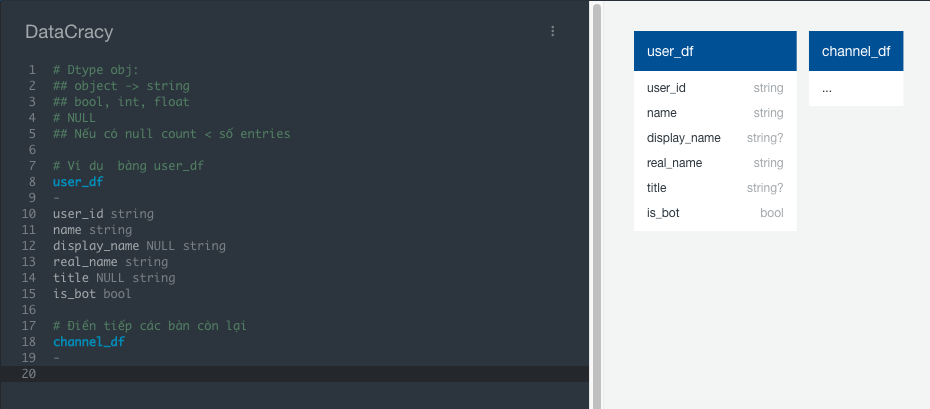

In [ ]:
## Điền vào bên dưới câu trả lời của bạn
## Bên dưới là ví dụ của bảng user_df (Điền tiếp các bản còn lại)
''' 
# Dtype obj: object -> string, bool, int, float
# NULL - Nếu có null count < số entries

# Ví dụ  bảng user_df 
user_df
-
user_id string
name string
display_name NULL string
real_name string
title NULL string
is_bot bool

# Điền tiếp các bản còn lại
channel_df

channel_id string 
channel_name string
is_channel bool 
creator string
created_at datetime
topic object
purpose object 
num_members  integer

msg_df
channel_id string
msg_id string
msg_ts datetime
user_id string
latest_replay datetime
reply_user_count integer
reply_users object
github_link string

## STEP 3: NGUYÊN TẮC CẦN ÁP DỤNG

### TODO#3: Rules & Logics
Dựa vào các kiến nghị `TODO#1` và Quan sát ở `TODO#2`, bạn có những đề xuất gì về rules trong vận hành để cải thiện thông tin và quan sát? 

#### Về mặt vận hành
> Rules gì cần áp dụng cho cách thức nhập data?

**Một số gợi ý**
1. Rules để cải thiện tỷ lệ NULL trong các bạn? (Ví dụ: Bắt buộc nhập các thông tin trên Slack? Có cần thiết không?)
2. Làm sao để xác định message nào là bài submit assigment? Message nào là review? Message vào là các nội dung không liên quan? (Ví dụ: Users để tag #submit, #review?)
3. ...

#### Về mặt data
> Logics gì cần áp dụng để kiểm tra sự hợp lý của Data?

**Một số gợi ý**
1. Hai users trùng tên?
2. Ngày latest reply > ngày post? 
3. Ngày post trong năm 2021 (sau khi dự án DataCracy thành lập)
4. Mentor Group nào sẽ chỉ post trong channel discussion của group đó?
5. ...

Bạn có thể đưa các đề xuất để đưa vào vận hành nhằm cải thiện data và giúp bạn đo lường theo dõi các metrics đã được liệt kể trong `TODO#1`

In [ ]:
## Điền vào bên dưới câu trả lời của bạn
''' 
RULES
---
1. 
2. 
3. 
4. 
'''

In [ ]:
## Điền vào bên dưới câu trả lời của bạn
''' 
LOGICS
---
1. 
2. 
3. 
4. 
'''

## STEP 4: TỔ CHỨC BẢNG - PRIMARY KEYS

In [ ]:
## Hints: nunique() để check số giá trị unique của từng trường
user_df.nunique()

user_id         74
name            74
display_name    48
real_name       72
title            5
is_bot           2
dtype: int64

### TODO#4: Tables & PK
1. Nhìn lại diagram của `TODO#2` trong Quick DBD Diagram: Có bảng nào bạn nghĩ nên gộp lại, hay tách ra không? Vì sao?
2. Tìm Primary Key (PK): Unique cho từng dòng và Không NULL
> Primary Key (PK) là trường giá trị/ID unique cho mỗi dòng của bảng. Hay nói cách khác, không có hai dòng trùng lặp (duplicate ID). 
* Fun fact để nhớ: Thử tưởng tượng nếu 2 người không quen biết, có cùng Số TK Ngân hàng :((((

In [ ]:
## Copy lại phần text của TODO#2
## Đặt PK bên cạnh col bạn chọn làm PK
''' 
# Dtype obj: object -> string, bool, int, float
# NULL - Nếu có null count < số entries

# Ví dụ  bảng user_df 
user_df
-
user_id string PK
name string
display_name NULL string
real_name string
title NULL string
is_bot bool

# Điền tiếp các bản còn lại
channel_id string PK
channel_name string
is_channel bool 
creator string FK
created_at datetime
topic object
purpose object 
num_members  integer

msg_df
channel_id string FK
msg_id string PK
msg_ts datetime
user_id string FK
latest_replay datetime
reply_user_count integer
reply_users object
github_link string


## STEP 5: MỐI QUAN HỆ GIỮA CÁC BẢNG

### TODO#5: FK & Mapping
Như đã giới thiệu ở phần Concept, keys quan trọng trong Relational DB vì nó thể hiện mối quan hệ giữa các bạn, thông qua key, cho phép ta nối các bảng với nhau. 
Bây giờ ta sẽ đi tìm FK (Foreign Key):
> Foreign Key: Là các keys nằm trong một bảng để liên kết với PK trong bảng khác

1. Đâu là các ID trong bảng, nhưng không phải là PK (do thoả điều kiện unique)?
2. Các ID này dẫn đến PK nào trong các bảng còn lại?
3. Trong các key được nối với nhau, xác định kiểu quan hệ:
  * n:1 - PK ở bảng gốc lặp lại nhiều lần (nhiều dòng) ở bản chứa FK
  * 1:1 - PK ở bảng gốc chỉ nối với 1 dòng

**Ví dụ:** `channel_id string FK >- channel_df.channel_id`

In [ ]:
## Copy lại phần text của TODO#2
## Đặt FK bên cạnh col bạn chọn làm FK
## Và thể hiện mối quan hệ bằng: id >- bảng_gốc.id (FK là PK trong bảng gốc)
''' 
# Ví dụ  bảng user_df 
user_df
-
user_id string 
name string
display_name NULL string
real_name string
title NULL string
is_bot bool

msg_df
-
channel_id string FK >- channel_df.channel_id #Rel: n:1

# Điền tiếp các bản còn lại
channel_df

channel_id string 
channel_name string
is_channel bool 
creator string FK --> user_df.user_id #Rel: n:1
created_at datetime
topic object
purpose object 
num_members  integer

msg_df

channel_id string FK
msg_id string
msg_ts datetime
user_id string FK user_df.user_id #Rel: n:1
latest_replay datetime
reply_user_count integer
reply_users object
github_link string


## STEP 6: DIAGRAM & TEST
Sau khi làm hết `TODO#5` bạn sẽ được 1 DB Diagram như trong sample mẫu bên dưới (Sample này không phải của DataCracy)

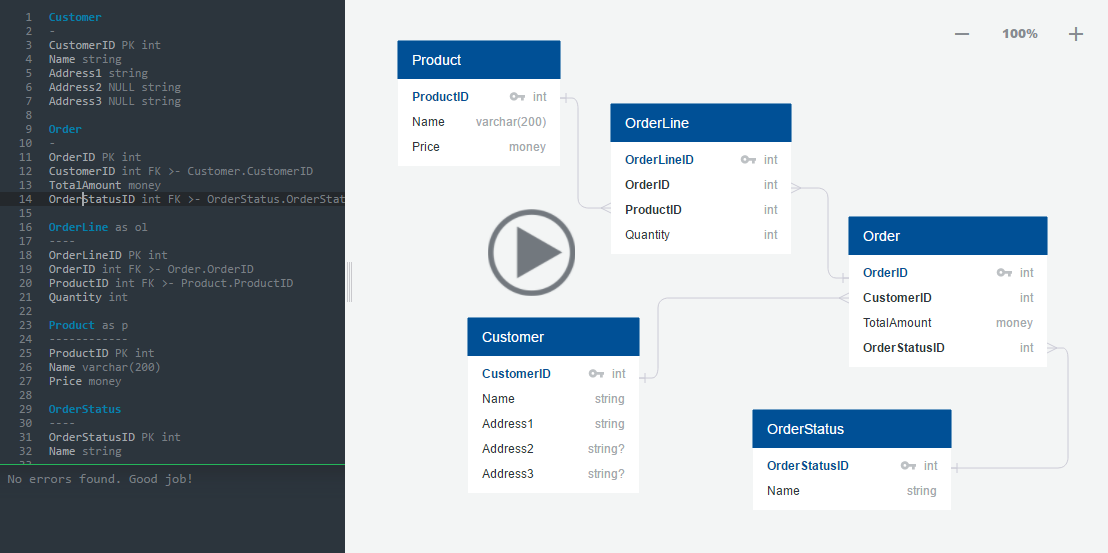

### Test Database Design by SQL
* Để giúp các bạn làm quen với việc thao tác trên SQL, ta sử dụng thư việc duckdb, cho phép ta thao tác với Data trên Python bằng SQL: https://duckdb.org/2021/05/14/sql-on-pandas.html
* Để hiểu các code SQL bên dưới, tham khảo [SQL Basic Cheatsheet](https://learnsql.com/blog/sql-basics-cheat-sheet/), xem các phần:
  * Querying Single Table
  * Aliases 
  * Filtering
  * Querying Multiple Tables: Các dạng Join
  * Aggregation Functions

* Dựa vào DB Diagram bạn đã vẽ, sẽ giúp bạn dễ dàng theo dõi hơn trong việc join và xử lý data

In [ ]:
## Đoạn code dưới join 2 bảng user_df vằ dtc_groups bằng key name => Tạo thành bảng members_df
SQL_dim_members = '''
-- Để comment trong SQL dùng -- tương đường với ## trong Python
CREATE TABLE members_df AS
SELECT 
  t1.*,
  t2.DataCracy_role
FROM user_df AS t1
JOIN dtc_groups AS t2
ON t1.name = t2.name
'''

In [ ]:
con = duckdb.connect(database=':memory:', read_only=False) # -> Tạo DB connection
# create a table
con.execute(SQL_dim_members) # -> Chạy đoạn lệch SQL
con.execute("SELECT * FROM members_df").fetch_df() # -> In 10 dòng đầu tiên của bảng members_df ra Dataframe

,user_id,name,display_name,real_name,title,is_bot,DataCracy_role
0,USLACKBOT,slackbot,Slackbot,Slackbot,,False,BTC
1,U01AT4T75JB,loclexuan26392,Loc Le Xuan,Loc Le Xuan,,False,BTC
2,U01AVDY7JET,locle.ds,Loc Le Xuan,Loc Le Xuan,,False,BTC
3,U01BE2PR6LU,maianhdang.ftu,MAD,Dặng Huỳnh Mai Anh,Technical Contents,False,BTC
4,U01C48T7S1J,huyenhoang.design,Thanh Huyen Hoang,Thanh Huyen Hoang,,False,BTC
...,...,...,...,...,...,...,...
60,U020P6WPAQJ,thuynh.386,,Thuy Nguyen,,False,Mentor_Gr4
61,U020P877V88,huongntn2202,,Huong Nguyen Thi Nhi,,False,NaN
62,U021TFMH1RU,mquang.151999,Quang Nguyen,Quang Nguyen,,False,NaN
63,U021Y57RMN1,lamlv723,Lâm Lê,Lam Le,,False,NaN


In [ ]:
con.execute("SELECT * FROM channel_df LIMIT 5").fetch_df() # -> In 5 dòng đầu tiên của bảng channel_df ra Dataframe

,channel_id,channel_name,is_channel,creator,created_at,topics,purpose,num_members
0,C01B4PVGLVB,general,True,U01BE2PR6LU,2020-09-23 10:25:03,,This is the one channel that will always inclu...,65
1,C01BYH7JHB5,contents,True,U01BE2PR6LU,2020-10-05 07:28:09,,,12
2,C01CAMNCJJV,branding-design,True,U01AVDY7JET,2020-10-05 03:16:30,,,9
3,C01U6P7LZ8F,atom-assignment1,True,U01BE2PR6LU,2021-04-17 07:00:04,Assigment#1 - Python Basics &amp; Spreadsheet ...,Where learners submit assignments and give rev...,44
4,C01UL6K1C7L,atom-week1,True,U01BE2PR6LU,2021-04-16 17:44:32,TOPIC: Data Strategy. Metrics Design. Spreadsh...,TOPIC: Data Strategy. Metrics Design. Spreadsh...,43


In [ ]:
con.execute("SELECT * FROM msg_df LIMIT 5").fetch_df() # -> In 5 dòng đầu tiên của bảng msg_df ra Dataframe

,channel_id,msg_id,msg_ts,user_id,latest_reply,reply_user_count,reply_users,github_link
0,C01B4PVGLVB,da7ab6eb-0b3c-4bd6-a12a-589a12c56604,2021-05-30 02:01:37.001200,U01BE2PR6LU,1970-01-01 00:00:00.000000,0,NaN,
1,C01B4PVGLVB,e289e819-5ec8-472b-8a48-900ef1874750,2021-05-29 02:02:53.006800,U01BE2PR6LU,2021-05-29 17:03:41.009500,1,NaN,
2,C01B4PVGLVB,07bbab9c-a507-4249-ad4e-c440be810076,2021-05-29 02:00:50.005000,U01BE2PR6LU,1970-01-01 00:00:00.000000,0,NaN,
3,C01B4PVGLVB,0b9a47d9-900e-4dcf-af8f-8897e6fe6fdd,2021-05-28 15:35:27.004100,U01BE2PR6LU,1970-01-01 00:00:00.000000,0,NaN,
4,C01B4PVGLVB,DEBF1A3C-17AA-4D53-AC27-1FE0884243DB,2021-05-28 13:50:27.000800,U01JQ5U1RPV,2021-05-29 02:00:50.005000,2,NaN,


In [ ]:
## Đoạn code dưới: Theo từng channel, count số message (phải join với bảng channel_df để lấy tên channel)
SQL = '''
SELECT 
  t2.channel_name,
  COUNT(DISTINCT t1.msg_id) AS msg_cnt
FROM msg_df AS t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
GROUP BY t2.channel_name 
ORDER BY COUNT(DISTINCT t1.msg_id) DESC
'''
con.execute(SQL).fetch_df()

,channel_name,msg_cnt
0,general,47
1,atom-assignment1,42
2,atom-assignment2,42
3,atom-assignment3,39
4,discuss-group1,32
5,atom-assignment4,26
6,discuss-group3,18
7,topics-python,13
8,discuss-group4,12
9,atom-week1,6


In [ ]:
## Đoạn code dưới: Lấy top 3 mentors post nhiều message nhất trong discuss-group của các nhóm
SQL = '''
WITH msg_cnt AS ( ------------- > (1) Chain SQL: tạo bảng tạm thời msg_cnt: count số msg theo user, theo channel
  SELECT 
    user_id,
    channel_id,
    COUNT(msg_id) AS msg_cnt
  FROM msg_df 
  GROUP BY 1, 2
)
SELECT
  t2.real_name,
  t3.channel_name,
  t1.msg_cnt,
  t2.DataCracy_role
FROM msg_cnt AS t1
JOIN members_df AS t2 ------------ > (2) Join msg_count với members_df để lấy tên và role
ON t1.user_id = t2.user_id
JOIN channel_df AS t3 --> (3) Join với channel_df để lấy tên channel
ON t1.channel_id = t3.channel_id
WHERE t2.DataCracy_role LIKE 'Mentor%' ------------- > (4) Filter Mentors
AND t3.channel_name LIKE 'discuss-group%' ---------- > (5) Filter channel discuss theo các group
ORDER BY t1.msg_cnt DESC ---------- > (6) Sẵp xếp theo số msg từ cao xuống thấp
LIMIT 3 ------------> (7) Lấy top 3
'''
con.execute(SQL).fetch_df()

,real_name,channel_name,msg_cnt,DataCracy_role
0,Phu NDT,discuss-group1,11,Mentor_Gr1
1,Nguyễn Quang Long,discuss-group3,10,Mentor_Gr3
2,Thuy Nguyen,discuss-group4,4,Mentor_Gr4


### TODO#6: SQL
* Thay đổi các phần trong những đoạn code SQL trên, print kết quả để hiểu về code
* Tham khảo thêm [SQL Basic Cheatsheet](https://learnsql.com/blog/sql-basics-cheat-sheet/)
* Và, GOOGLE! + Cùng trao đổi trên Slack
* Và viết SQL để trả lời các câu hỏi sau:
```
  1. Learners groups nào hoạt động tích cực trên Slack nhất? (tính theo message count)?
  Learners nào nộp bài sớm nhất trong Assignment 1, 2, 3?
  2. Learner nào nộp bài trễ nhất trong Assignment 1, 2, 3?
  3. Learner nào chưa nộp bài Assignment 3?
  4. Learner nào chưa nộp bất kỳ 1 assignment nào?
  5. Tỷ lệ % Learner đã nộp assignment 1, 2, 3? (*giả sử có message trong channel atom-assignment, được tính là đã submit*)
  6. Tỷ lệ % Learner đã submit bài và dc review trong assignment 1, 2, 3?
  7. Learners theo Group nào có tỷ lệ % hoàn thành bài tập cao nhất?
```
* `[Optional]` Bạn có thể tự đặt thêm bất kỳ câu hỏi nào bạn quan tâm



In [ ]:
SQL_1 = '''
WITH msg_cnt AS ( 
  SELECT 
    user_id,
    channel_id,
    COUNT(msg_id) AS msg_cnt
  FROM msg_df 
  GROUP BY 1, 2
)
SELECT
  t2.real_name,
  t3.channel_name,
  t1.msg_cnt,
  t2.DataCracy_role
FROM msg_cnt AS t1
JOIN members_df AS t2 
ON t1.user_id = t2.user_id
JOIN channel_df AS t3 
ON t1.channel_id = t3.channel_id
WHERE t2.DataCracy_role NOT LIKE 'Mentor%' 
ORDER BY t1.msg_cnt DESC 
LIMIT 1 
'''
con.execute(SQL_1).fetch_df()


,real_name,channel_name,msg_cnt,DataCracy_role
0,Dặng Huỳnh Mai Anh,general,31,BTC


In [ ]:
# Nop bai tre nhat
SQL_2 = '''
select t3.real_name, t1.msg_ts, github_link
from msg_df t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
JOIN members_df t3
ON t1.user_id=t3.user_id
where t2.channel_name='atom-assignment1'
and t1.github_link is not null
and t3.DataCracy_role NOT LIKE 'Mentor%' 
order by msg_ts desc
limit 1
'''
con.execute(SQL_2).fetch_df()


,real_name,msg_ts,github_link
0,Nguyen Thi Hong Hanh,2021-05-13 14:09:48.011,


In [ ]:
SQL_2 = '''
select t3.real_name, t1.msg_ts, github_link
from msg_df t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
JOIN members_df t3
ON t1.user_id=t3.user_id
where t2.channel_name='atom-assignment2'
and t1.github_link is not null
and t3.DataCracy_role NOT LIKE 'Mentor%' 
order by msg_ts desc
limit 1
'''
con.execute(SQL_2).fetch_df()


,real_name,msg_ts,github_link
0,Nguyen Thi Hong Hanh,2021-05-22 05:39:34.015500,https://github.com/nguyenhonghanh2511/


In [ ]:
SQL_2 = '''
select t3.real_name, t1.msg_ts, github_link
from msg_df t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
JOIN members_df t3
ON t1.user_id=t3.user_id
where t2.channel_name='atom-assignment3'
and t1.github_link is not null
and t3.DataCracy_role NOT LIKE 'Mentor%' 
order by msg_ts desc
limit 1
'''
con.execute(SQL_2).fetch_df()


,real_name,msg_ts,github_link
0,Nguyen Thi Hong Hanh,2021-05-30 14:46:39.001800,


In [ ]:
# Nop bai som nhat
SQL_2 = '''
select t3.real_name, t1.msg_ts, github_link
from msg_df t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
JOIN members_df t3
ON t1.user_id=t3.user_id
where t2.channel_name='atom-assignment1'
and display_name != 'MAD'
and t1.github_link is not null and t1.github_link != ''
and t3.DataCracy_role NOT LIKE 'Mentor%' 
order by msg_ts
limit 1
'''
con.execute(SQL_2).fetch_df()


,real_name,msg_ts,github_link
0,Dương Phan Nam Hưng,2021-04-21 06:00:34.000800,https://github.com/duongphannamhung/


In [ ]:
# Nop bai som nhat
SQL_2 = '''
select t3.real_name, t1.msg_ts, github_link
from msg_df t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
JOIN members_df t3
ON t1.user_id=t3.user_id
where t2.channel_name='atom-assignment2'
and display_name != 'MAD'
and t1.github_link is not null and t1.github_link != ''
and t3.DataCracy_role NOT LIKE 'Mentor%' 
order by msg_ts
limit 1
'''
con.execute(SQL_2).fetch_df()

,real_name,msg_ts,github_link
0,Toan Tran,2021-05-12 15:50:48.004,https://github.com/toantran2206/


In [ ]:
# Nop bai som nhat
SQL_2 = '''
select t3.real_name, t1.msg_ts, github_link
from msg_df t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
JOIN members_df t3
ON t1.user_id=t3.user_id
where t2.channel_name='atom-assignment3'
and display_name != 'MAD'
and t1.github_link is not null and t1.github_link != ''
and t3.DataCracy_role NOT LIKE 'Mentor%' 
order by msg_ts
limit 1
'''
con.execute(SQL_2).fetch_df()

,real_name,msg_ts,github_link
0,Nguyen Thi Hong Hanh,2021-05-16 12:08:08.018900,https://github.com/nguyenhonghanh2511/


In [ ]:
# 3. Learner nào chưa nộp bài Assignment 3?
SQL_2 = '''
select t3.real_name, t1.msg_ts, github_link
from msg_df t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
JOIN members_df t3
ON t1.user_id=t3.user_id
where t2.channel_name='atom-assignment3'
and display_name != 'MAD'
and t1.github_link = ''
and t3.DataCracy_role NOT LIKE 'Mentor%' 
'''
con.execute(SQL_2).fetch_df()

,real_name,msg_ts,github_link
0,Nguyen Thi Hong Hanh,2021-05-30 14:46:39.001800,
1,Nguyen Thi Hong Hanh,2021-05-16 06:02:30.007400,


In [ ]:
# 4. Learner nào chưa nộp bất kỳ 1 assignment nào?
SQL_2 = '''
select distinct t3.real_name, t1.msg_ts, github_link, channel_name
from msg_df t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
JOIN members_df t3
ON t1.user_id=t3.user_id
where t2.channel_name in ('atom-assignment3', 'atom-assignment1', 'atom-assignment2')
and display_name != 'MAD'
and t1.github_link = ''
and t3.DataCracy_role NOT LIKE 'Mentor%' 
'''
con.execute(SQL_2).fetch_df()

,real_name,msg_ts,github_link,channel_name
0,Nguyen Thi Hong Hanh,2021-05-13 14:09:48.011000,,atom-assignment1
1,Linh Vu,2021-05-10 03:07:35.001200,,atom-assignment1
2,Quan Nguyễn,2021-05-08 06:31:59.005200,,atom-assignment1
3,Việt Hồng Chu,2021-05-08 02:56:13.001700,,atom-assignment1
4,Vy Le,2021-04-26 06:53:56.000800,,atom-assignment1
5,Ha Nguyễn,2021-04-24 01:44:32.042500,,atom-assignment1
6,Anh Ha Van Huỳnh,2021-04-23 12:55:27.014000,,atom-assignment1
7,Hồng Dới,2021-04-23 01:47:56.001500,,atom-assignment1
8,Dinh Tuấn Phạm,2021-04-22 18:38:16.010700,,atom-assignment1
9,Toan Tran,2021-05-14 16:15:27.016800,,atom-assignment2


In [ ]:
# 5. Tỷ lệ % Learner đã nộp assignment 1, 2, 3? (*giả sử có message trong channel atom-assignment, được tính là đã submit*)
SQL_2 = ''' 
select (count(distinct real_name) * 100 / (select count(1) from members_df
  where display_name != 'MAD'
 AND DataCracy_role NOT LIKE 'Mentor%')) as ti_le_nop_bai from (
select t3.real_name, t1.msg_ts, github_link, channel_name
from msg_df t1
JOIN channel_df AS t2
ON t1.channel_id = t2.channel_id
JOIN members_df t3
ON t1.user_id=t3.user_id
where t2.channel_name in ('atom-assignment3', 'atom-assignment1', 'atom-assignment2')
and display_name != 'MAD'
and t1.github_link != ''
and t3.DataCracy_role NOT LIKE 'Mentor%') t 
'''
con.execute(SQL_2).fetch_df()

,ti_le_nop_bai
0,68


In [ ]:
6. Tỷ lệ % Learner đã submit bài và dc review trong assignment 1, 2, 3?
7. Learners theo Group nào có tỷ lệ % hoàn thành bài tập cao nhất?

## Pandas vs. SQL 
* Python Pandas và SQL dù là 2 ngôn ngữ khác nhau, nhưng về cách thức thao tác và chuyển đổi data thì như nhau
* Tuỳ theo từng tình huống cụ thể mà ta sẽ sử dụng Python Pandas hay SQL
* Nhưng các bước thao tác/khám phá/tổng hợp data căn bản nhất gồm:

| Thao tác   |     SQL      |  Python | SpreadSheet |
|------------|-------------|------|----------|
| Filter/Selection |  WHERE | df['col'] | Filter |
| Join Data | JOIN | .join() | - |
| Group Data |    GROUP BY   |   .groupby(col) | Pivot |
| Summarize | SUM, AVG, MIN, MAX | .sum(), .mean(), .min(), .max() | SUM, MIN, MAX |

* Tìm hiểu cách thao tác bằng Pandas. [Pandas CheatSheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) => Xem các phần:
  * **Subset(Rows & Columns)**
  * **Summarize Data**: Để làm các phép tổng hợp, thống kê
  * **Group Data**: Tương đương với Pivot trong Excel và `GROUP BY` trong SQL
  * **Combine Data**: Tương đương với `JOIN` trong SQL
  * **Plot**


In [ ]:
## Ví dụ: Đoạn code (Pandas) sau làm
## 1. Group by channel_id
## 2. Count các message
## 3. Sắp xếp theo thứ tự số message từ cao xuống thấp (ascending=False)
## 4. Filter lấy Top 5
msg_df.groupby('channel_id')['msg_id'].count().sort_values(ascending=False).head(5)

channel_id
C021FSDN7LJ    42
C01U6P7LZ8F    42
C01B4PVGLVB    37
C0227A51SAY    32
C0220KU9399    18
Name: msg_id, dtype: int64

In [ ]:
## Kết quả tương ứng bằng SQL
SQL = '''
  SELECT 
    channel_id,
    COUNT(msg_id) AS msg_cnt
  FROM msg_df 
  GROUP BY 1
  ORDER BY COUNT(msg_id) DESC
  LIMIT 5
'''
con.execute(SQL).fetch_df()

,channel_id,msg_cnt
0,C021FSDN7LJ,42
1,C01U6P7LZ8F,42
2,C01B4PVGLVB,37
3,C0227A51SAY,32
4,C0220KU9399,18


### TODO#7 (Optional): Pandas
* Thực hiện lại các thao tác trong `TODO#6.2` bằng Python Pandas

In [ ]:
# YOUR CODE